## Import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Understanding

### Intial Analysis

In [3]:
delivery_time.shape

(21, 2)

In [4]:
delivery_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## Assumption check

### 1. Linearity Check

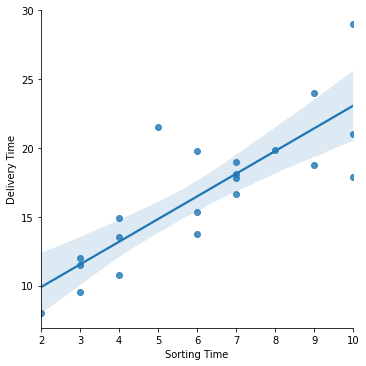

In [6]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_time)
plt.show()

### Normality Check

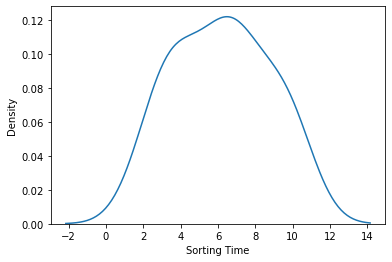

In [7]:
sns.distplot(a=delivery_time['Sorting Time'],hist=False)
plt.show()

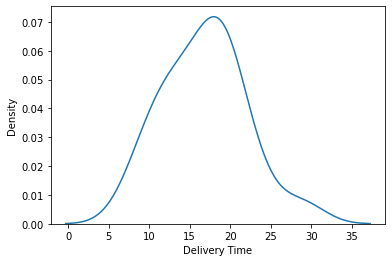

In [8]:
sns.distplot(a=delivery_time['Delivery Time'],hist=False)
plt.show()

In [9]:
delivery_time.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

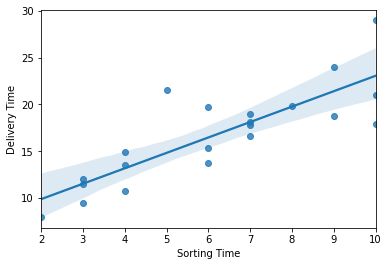

In [10]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=delivery_time)
plt.show()

## Model Building

In [11]:
import statsmodels.formula.api as smf

In [12]:
x=delivery_time['Sorting Time']
y=delivery_time['Delivery Time']

In [13]:
Linear_model = smf.ols(formula='y~x',data=delivery_time).fit()

In [14]:
Linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

## Model Evaluation

In [15]:
y_pred = Linear_model.predict(delivery_time)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred))
print('r2 score is ',r2_score(y,y_pred))

mean squared error is  7.793311548584062
r2 score is  0.6822714748417231
